In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer
from utils.monte_carlo_resampling_operator import MonteCarloResamplingOperator

In [2]:
%%time

animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
result[0]
#TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


CPU times: user 2min 17s, sys: 222 ms, total: 2min 18s
Wall time: 2min 18s


In [3]:
shuffle_calculator = result[0]
df = shuffle_calculator.shuffle_dfs
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.43635,-0.015031,0.000314,-0.004749,-0.013173,-0.012492,-0.001819,0.007796,0.009366,0.07959,...,0.033263,-0.000693,-0.003983,0.040066,-0.011576,0.029565,-0.008757,0.00463,-0.011747,0.487908
1,0.49026,0.012909,-0.011211,-0.000728,0.006057,-0.018085,0.003103,-0.010699,-0.003665,-0.00621,...,0.03329,0.012335,0.05976,0.060689,-0.005421,0.022057,0.015905,0.062056,-0.001973,0.384003
2,0.441576,0.014705,-0.000835,-0.012929,-0.004751,0.001357,0.006838,0.007578,0.018263,0.043735,...,-0.011645,-0.00724,-0.001632,0.003508,0.009822,-0.008425,0.021661,-0.000058,-0.005759,0.494227
3,0.45983,0.006052,-0.005601,0.021642,-0.007356,0.002288,0.021989,0.013005,-0.003194,0.043811,...,0.015224,0.023353,-0.008696,0.01431,-0.015867,0.012404,0.002405,0.008326,-0.0041,0.394041
4,0.408834,0.049746,0.003728,-0.009404,-0.00217,-0.005303,0.028809,0.000406,0.037354,0.049076,...,0.01274,-0.008545,0.00987,-0.004971,-0.006695,0.035867,-0.008445,-0.00655,-0.002161,0.365973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.523456,0.059211,0.02304,0.011857,-0.001276,0.001513,-0.002651,0.026925,0.019258,0.038139,...,0.002647,0.038568,0.008002,0.018065,0.016849,0.000852,0.061847,0.009674,0.013181,0.360231
996,0.411256,-0.006933,-0.003558,0.002927,-0.000537,0.002067,-0.002378,0.00364,0.030981,-0.014586,...,-0.0146,0.021404,0.036527,0.017897,0.012697,-0.009206,-0.005206,0.029967,0.025257,0.371311
997,0.551252,-0.00829,0.001344,-0.010953,-0.011762,0.001312,-0.001971,-0.010481,-0.000389,0.02869,...,-0.008252,0.042889,0.016279,0.031643,-0.006443,-0.000831,0.01767,0.009834,-0.01056,0.397532
998,0.505179,-0.01582,-0.005731,-0.003965,0.035245,-0.007836,0.016517,-0.002873,-0.010811,0.026432,...,0.017684,0.039434,0.012332,0.003133,-0.011572,-0.002115,0.003868,-0.006244,-0.01124,0.46989


In [4]:
mc = MonteCarloResamplingOperator()
mc.model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_404a3878afe87d0b776df5172a45ee1a NOW.


(array([185., 270., 188., 118.,  87.,  44.,  39.,  26.,  15.,  11.,   8.,
          2.,   3.,   2.,   2.]),
 array([-0.018639501894128083, -0.0074904004047535045,
        0.0036587010846210744, 0.014807802573995655, 0.025956904063370232,
        0.037106005552744806, 0.0482551070421194, 0.059404208531493974,
        0.07055331002086855, 0.08170241151024313, 0.0928515129996177,
        0.10400061448899228, 0.11514971597836687, 0.12629881746774144,
        0.13744791895711603, 0.1485970204464906], dtype=object),
 <BarContainer object of 15 artists>)

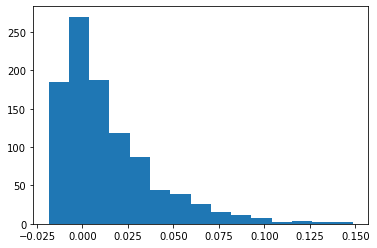

In [5]:
plt.hist(df.iloc[:, 1], bins=15)

In [6]:
%%time

items = df.iloc[:, 1]
fit = mc.resampling(items)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 53 ms, sys: 92 ms, total: 145 ms
Wall time: 556 ms


array([[<AxesSubplot:title={'center':'shape'}>,
        <AxesSubplot:title={'center':'shape'}>],
       [<AxesSubplot:title={'center':'rate'}>,
        <AxesSubplot:title={'center':'rate'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'Y_s'}>,
        <AxesSubplot:title={'center':'Y_s'}>]], dtype=object)

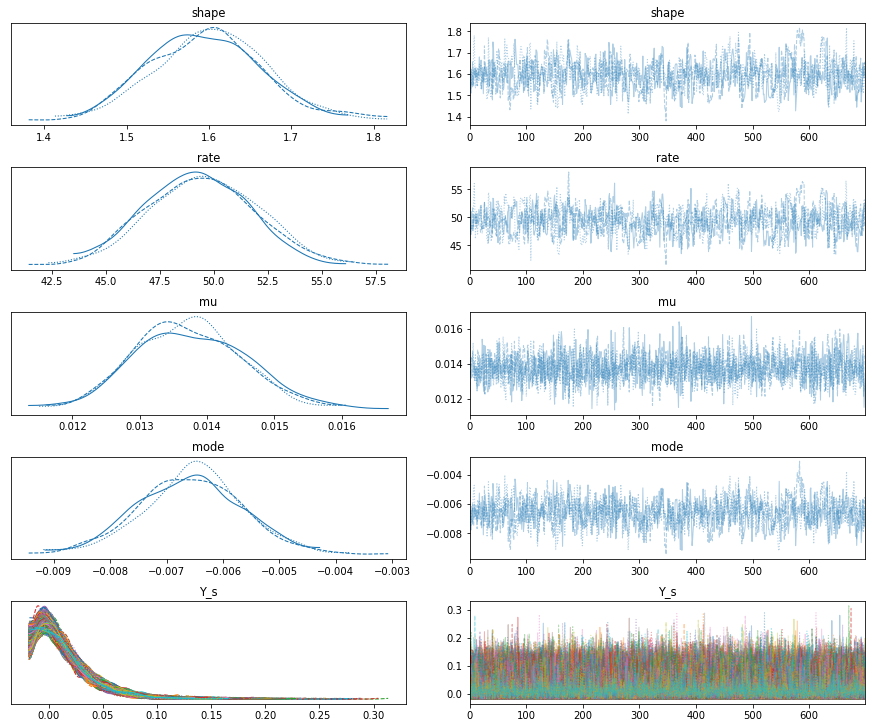

In [8]:
import arviz
arviz.plot_trace(fit)

In [9]:
print(fit)

Inference for Stan model: anon_model_404a3878afe87d0b776df5172a45ee1a.
3 chains, each with iter=1000; warmup=300; thin=1; 
post-warmup draws per chain=700, total post-warmup draws=2100.

             mean se_mean     sd    2.5%     25%     50%     75%   97.5%  n_eff   Rhat
shape         1.6  2.9e-3   0.07    1.47    1.55     1.6    1.64    1.74    524   1.01
rate        49.39    0.11   2.43   44.76   47.67   49.39   51.09    54.2    529   1.01
mu           0.01  1.8e-5 8.2e-4    0.01    0.01    0.01    0.01    0.02   1985    1.0
mode      -6.6e-3  3.5e-5 9.1e-4 -8.4e-3 -7.2e-3 -6.5e-3 -6.0e-3 -4.8e-3    684    1.0
Y_s[1]       0.01  5.7e-4   0.03   -0.02 -4.9e-3  7.5e-3    0.02    0.08   2003    1.0
Y_s[2]       0.01  5.5e-4   0.03   -0.02 -4.8e-3  7.1e-3    0.03    0.08   2115    1.0
Y_s[3]       0.02  5.9e-4   0.03   -0.02 -4.7e-3  8.4e-3    0.03    0.08   2201    1.0
Y_s[4]       0.01  5.4e-4   0.02   -0.02 -5.3e-3  7.2e-3    0.03    0.07   2117    1.0
Y_s[5]       0.01  5.7e-4   0.

In [10]:
ddf = pd.DataFrame(fit.extract('Y_s')['Y_s'])
ddf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.007104,0.044329,0.041347,0.045759,0.003224,-0.001039,0.064960,-0.007922,0.010473,-0.013427,...,0.038352,-0.011352,0.004914,-0.000834,-0.012371,-0.010876,0.009485,0.010470,0.021524,-0.014622
1,-0.002540,0.008446,-0.004512,-0.004586,-0.016521,0.025650,0.038180,0.019456,-0.003391,-0.003718,...,0.013243,-0.005800,-0.009817,0.015785,-0.002649,-0.001121,-0.003889,-0.011087,-0.014502,0.018413
2,0.024997,0.042564,0.018025,-0.012542,-0.010291,-0.014657,0.009590,0.000258,0.014747,-0.002858,...,0.037328,0.023375,0.008373,0.032812,0.002071,-0.015878,-0.002231,0.018311,-0.000662,0.027772
3,-0.005549,0.012518,-0.010601,0.020006,0.058330,-0.010294,0.054063,0.063038,0.006620,-0.001886,...,0.034987,-0.012477,-0.010160,0.016604,-0.001637,0.050805,0.026768,0.057579,0.019054,-0.006181
4,-0.008384,0.006195,0.016091,-0.014589,-0.007882,0.047666,0.027259,-0.003052,0.005261,-0.017546,...,0.001771,-0.017690,0.021858,-0.007406,0.042667,-0.011960,0.031438,-0.003329,-0.008464,0.025076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.038344,-0.016123,0.048784,0.024989,-0.000506,0.021603,0.005269,0.051944,0.021056,-0.002686,...,0.021358,-0.013286,0.005586,0.013712,0.065380,0.024893,0.002202,0.009874,0.031147,0.032998
2096,-0.003777,0.001834,0.012099,0.013728,0.010200,0.001937,0.024432,0.000285,0.012342,-0.006836,...,0.001948,0.040341,0.024975,0.003417,-0.016485,-0.011510,0.008136,0.062214,-0.001467,-0.006211
2097,0.001662,-0.010595,-0.010997,-0.016663,0.034576,0.007214,0.012965,0.014594,0.025991,0.044151,...,0.042567,0.051072,0.005690,0.026382,-0.010973,-0.012462,0.049979,0.020367,0.035478,0.006799
2098,-0.001422,-0.007687,0.028770,0.014509,0.000016,-0.009867,0.039075,0.060059,0.029283,-0.007558,...,-0.008064,0.008067,-0.009784,0.026556,0.003304,0.014580,0.019199,-0.006798,-0.007665,-0.005049


In [11]:
mode = np.mean(fit.extract('mode')['mode'])
mode

-0.006563781794166816

In [12]:
#resampling = mc.resamplings(df)
#resampling

In [13]:
#TimeCorrelationViewer(resampling, result[1], result[2]).draw(title='A1postES 0-40s in %s' % animal_name)